![work-in-progress.png](../../data/images/work-in-progress.png)

# Imbalanced datasets
# Under sampling Cluster Centroids

## Under Sampling

1. Prototype generation
2. Prototype selection


**Cluster Centroids** one of prototype generation algorithms used in undersampling, how does Cluster Centroids methods ? [[1.1.]](#resources)

let say we have original data set $S$ this algorithm, will generate new dataset $S'$ where $|S'| < |S|$ and $S' \notin S$, that's mean the samples of majority class will be reduced by generating new samples and `not selected`

1. Keep in mind that this method requires that your data are grouped into clusters. 
2. The number of centroids should be set such that the under-sampled clusters are representative of the original one.


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import time
from collections import Counter

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt


# [0.1.] [0.2.] [0.3.]
#normal charts inside notebooks
%matplotlib inline 


# import seaborn as sns
# sns.set()


# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")


from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline as SK_Pipeline
from sklearn.preprocessing import StandardScaler


from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

In [2]:
# Paths ...
PROJECT_ROOT_DIR = os.getcwd()
PATH_TO_DATA = '../../data'  # TODO make cross

# Const ...
DATA_RATIO = .1
INDEX_TO_REMOVE = 2
CLASS_0 = 0
CLASS_1 = 1
CLASS_2 = 2

In [3]:
# methods ...

def scatter_plot(x_, y_, title_='scatter_plot'):
    #...
    x_min, x_max = x_[:, 0].min() - .5, x_[:, 0].max() + .5
    y_min, y_max = x_[:, 1].min() - .5, x_[:, 1].max() + .5

    #...
    plt.figure(2, figsize=(8, 6), dpi=100)
    plt.clf()

    # Plot the training points
    plt.scatter(x_[:, 0], x_[:, 1], c=y_, cmap=plt.cm.Set1, edgecolor='k', alpha=0.6)


#     for i in range(x_.shape[0]):
#         plt.text(x_[i,0], x_[i,1], str(i))

    #...
    plt.title('{}, y={}'.format(title_, Counter(y_)))
#     plt.legend()
    plt.grid()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
#     plt.xticks(())
#     plt.yticks(())

    plt.show();


def subplot(ax, x_, y_, title_=''):
    # ...
    x_min, x_max = x_[:, 0].min() - .5, x_[:, 0].max() + .5
    y_min, y_max = x_[:, 1].min() - .5, x_[:, 1].max() + .5

    # ...
    ax.set_title(title_)
    plt.scatter(x_[:, 0], x_[:, 1], c=y_, cmap=plt.cm.Set1, edgecolor='k')

    # ...
    plt.grid()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [4]:
# import some data to play with
iris = datasets.load_iris()
X_ = iris.data
y_ = iris.target

In [5]:
# First case ...
pca_iris = PCA(n_components=2)
pca_iris.fit(X_)

PCA(n_components=2)

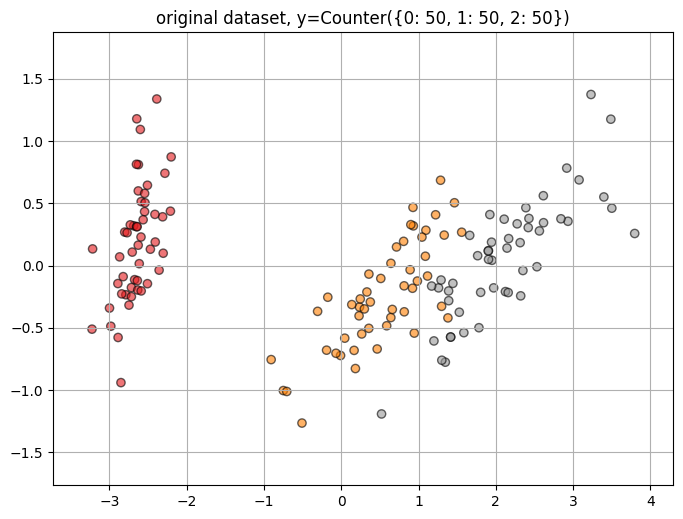

In [6]:
scatter_plot(pca_iris.transform(X_), y_, 'original dataset')

## Data

In [7]:
# # ...
# index_0 = np.where(y == CLASS_0)
# index_1 = np.where(y == CLASS_1)
# index_2 = np.where(y == CLASS_2)

# X_0 = X[index_0]
# X_1 = X[index_1]
# X_2 = X[index_2]

# y_0 = y[index_0]
# y_1 = y[index_1]
# y_2 = y[index_2]


# shuffled_indices_x_0 = np.random.permutation(index_0[0])
# shuffled_indices_x_1 = np.random.permutation(index_1[0])
# shuffled_indices_x_2 = np.random.permutation(index_2[0])

# INDEX_RATIO = int(len(shuffled_indices_x_0) * DATA_RATIO)

In [8]:
# X_0 = X_0[:INDEX_RATIO]
# y_0 = y_0[:INDEX_RATIO]

# X = F
# y = np.concatenate((y_1, y_0))

In [9]:
# X_1 = X_1[:index_ratio]
# y_1 = y_1[:index_ratio]

# X = np.concatenate((X_0, X_1))
# y = np.concatenate((y_0, y_1))

In [10]:
# X_2 = X_2[:index_ratio]
# y_2 = y_2[:index_ratio]

# X = np.concatenate((X_0, X_2))
# y = np.concatenate((y_0, y_2))

In [11]:
# classes 0, 1
index = np.where(y_ != INDEX_TO_REMOVE)

X_0 = X_[index][:55]
y_0 = y_[index][:55]

In [12]:
# classes 1, 2
INDEX_TO_REMOVE = 0

index = np.where(y_ != INDEX_TO_REMOVE)

X_1 = X_[index][:55]
y_1 = y_[index][:55]

In [13]:
# classes 1, 2
SELECTED_INDEX = [127, 110, 134, 133, 123]

X = np.concatenate((X_[50:100], X_[SELECTED_INDEX]))
y = np.concatenate((y_[50:100], y_[SELECTED_INDEX]))

X_test = np.concatenate((X_[75:100], X_[135:]))
y_test = np.concatenate((y_[75:100], y_[135:]))

In [14]:
X.shape

(55, 4)

In [15]:
y.shape

(55,)

In [16]:
X[:2]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5]])

In [17]:
np.asarray(np.unique(y, return_counts=True)).T

array([[ 1, 50],
       [ 2,  5]])

In [18]:
# SECOND CASE ...
# pca_iris = PCA(n_components=2)
# pca_iris.fit(X)

In [19]:
X_reduced_2d = pca_iris.transform(X)
X_reduced_2d[:2]

array([[1.28482569, 0.68516047],
       [0.93248853, 0.31833364]])

In [20]:
X_reduced_2d.shape

(55, 2)

In [21]:
y.shape

(55,)

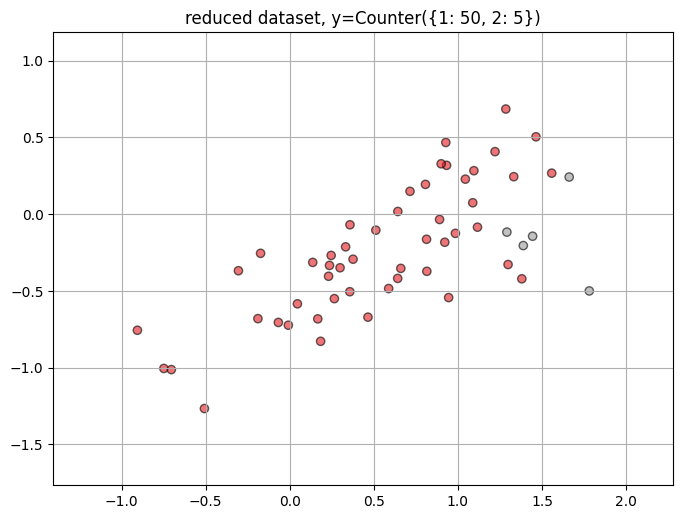

In [22]:
scatter_plot(X_reduced_2d, y, 'reduced dataset')

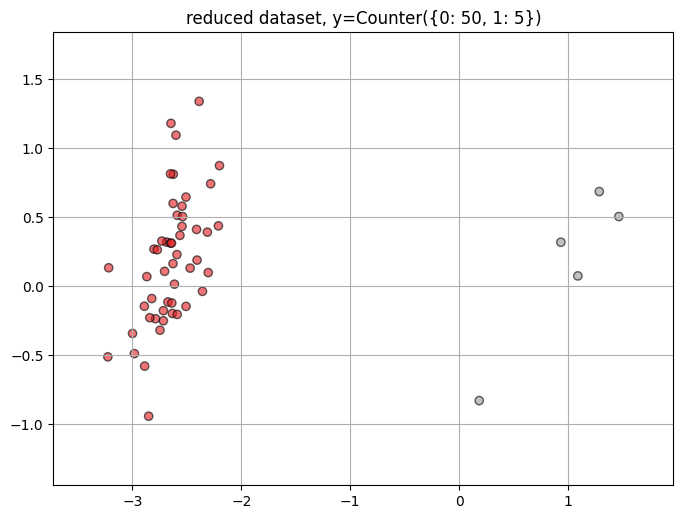

In [23]:
scatter_plot(pca_iris.transform(X_0), y_0, 'reduced dataset')

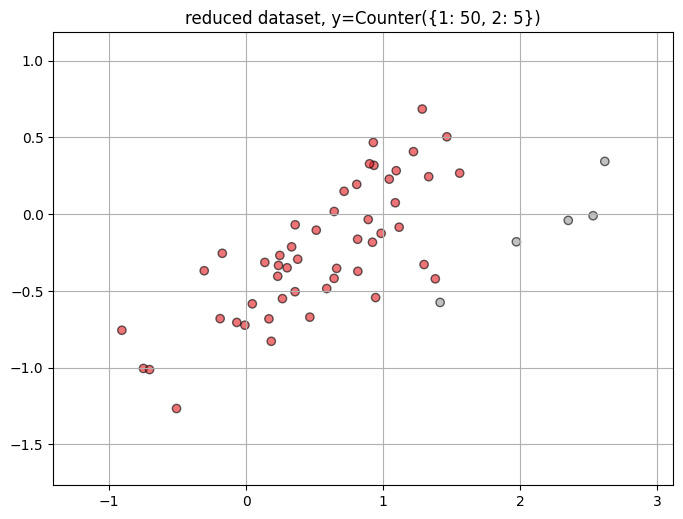

In [24]:
scatter_plot(pca_iris.transform(X_1), y_1, 'reduced dataset')

## Resembling

### ex. 1

In [25]:
cluster_centroids = ClusterCentroids(random_state=0)
cluster_centroids

ClusterCentroids(random_state=0)

In [26]:
X_resampled, y_resampled = cluster_centroids.fit_resample(X, y) # first do balancing. ????????????????

In [27]:
X_resampled.shape

(10, 4)

In [28]:
y_resampled.shape

(10,)

In [29]:
X_resampled_2d = pca_iris.transform(X_resampled) # Second do reduction ????????????????

In [30]:
X_resampled_2d.shape

(10, 2)

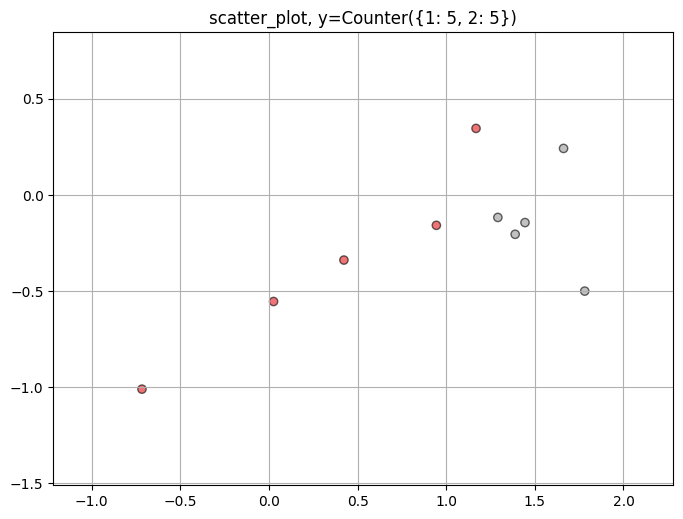

In [31]:
scatter_plot(X_resampled_2d, y_resampled)

**Notes**

Samples of minority class are keeped, in another hand number of samples in majority class are equal to the number samples of minority class, the samples of major `are generated` not the same as in original dataset.

**Samples of minority class**

In [32]:
X_resampled_2d[5:]

array([[ 1.29113206, -0.11666865],
       [ 1.66177415,  0.24222841],
       [ 1.78129481, -0.49990168],
       [ 1.44416124, -0.14341341],
       [ 1.38876613, -0.20439933]])

In [33]:
X_reduced_2d[50:]

array([[ 1.29113206, -0.11666865],
       [ 1.66177415,  0.24222841],
       [ 1.78129481, -0.49990168],
       [ 1.44416124, -0.14341341],
       [ 1.38876613, -0.20439933]])

**Samples of majority class**

In [34]:
X_resampled_2d[:5]

array([[ 0.42254514, -0.33841154],
       [ 1.16795136,  0.3463107 ],
       [-0.71699129, -1.00980094],
       [ 0.94411495, -0.15774458],
       [ 0.02553706, -0.55398473]])

In [35]:
X_reduced_2d[:50]

array([[ 1.28482569,  0.68516047],
       [ 0.93248853,  0.31833364],
       [ 1.46430232,  0.50426282],
       [ 0.18331772, -0.82795901],
       [ 1.08810326,  0.07459068],
       [ 0.64166908, -0.41824687],
       [ 1.09506066,  0.28346827],
       [-0.74912267, -1.00489096],
       [ 1.04413183,  0.2283619 ],
       [-0.0087454 , -0.72308191],
       [-0.50784088, -1.26597119],
       [ 0.51169856, -0.10398124],
       [ 0.26497651, -0.55003646],
       [ 0.98493451, -0.12481785],
       [-0.17392537, -0.25485421],
       [ 0.92786078,  0.46717949],
       [ 0.66028376, -0.35296967],
       [ 0.23610499, -0.33361077],
       [ 0.94473373, -0.54314555],
       [ 0.04522698, -0.58383438],
       [ 1.11628318, -0.08461685],
       [ 0.35788842, -0.06892503],
       [ 1.29818388, -0.32778731],
       [ 0.92172892, -0.18273779],
       [ 0.71485333,  0.14905594],
       [ 0.90017437,  0.32850447],
       [ 1.33202444,  0.24444088],
       [ 1.55780216,  0.26749545],
       [ 0.81329065,

### ex2.

In [36]:
cluster_centroids_0 = ClusterCentroids(random_state=0)
cluster_centroids_0

ClusterCentroids(random_state=0)

In [37]:
X_resampled_0, y_resampled_0 = cluster_centroids_0.fit_resample(X_0, y_0) # first do balancing. ????????????????

In [38]:
X_resampled_0.shape

(10, 4)

In [39]:
X_resampled_0_2d = pca_iris.transform(X_resampled_0) # Second do reduction ????????????????

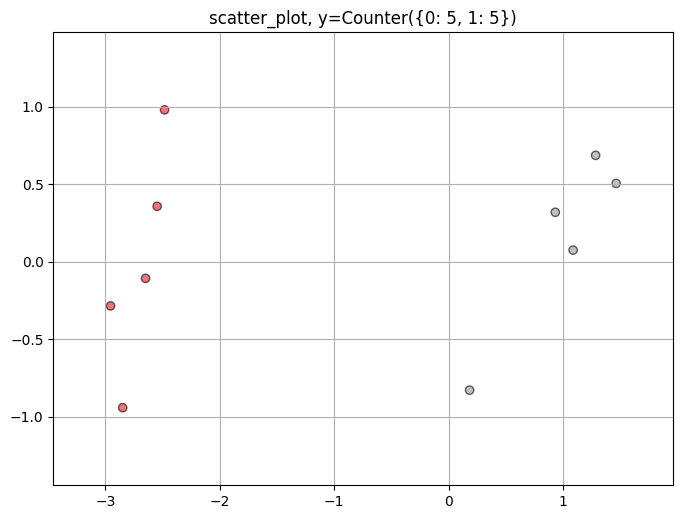

In [40]:
scatter_plot(X_resampled_0_2d, y_resampled_0)

### ex. 3

In [41]:
cluster_centroids_1 = ClusterCentroids(random_state=0)
cluster_centroids_1

ClusterCentroids(random_state=0)

In [42]:
X_resampled_1, y_resampled_1 = cluster_centroids_1.fit_resample(X_1, y_1) # first do balancing. ????????????????

In [43]:
X_resampled_1.shape

(10, 4)

In [44]:
X_resampled_1_2d = pca_iris.transform(X_resampled_1) # Second do reduction ????????????????

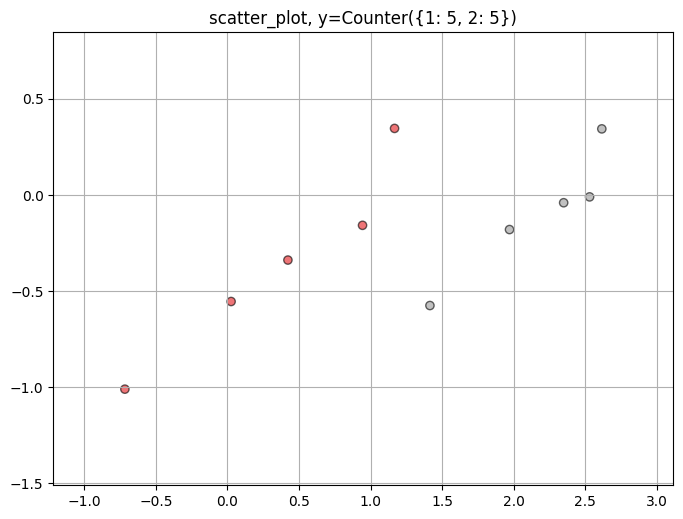

In [45]:
scatter_plot(X_resampled_1_2d, y_resampled_1)

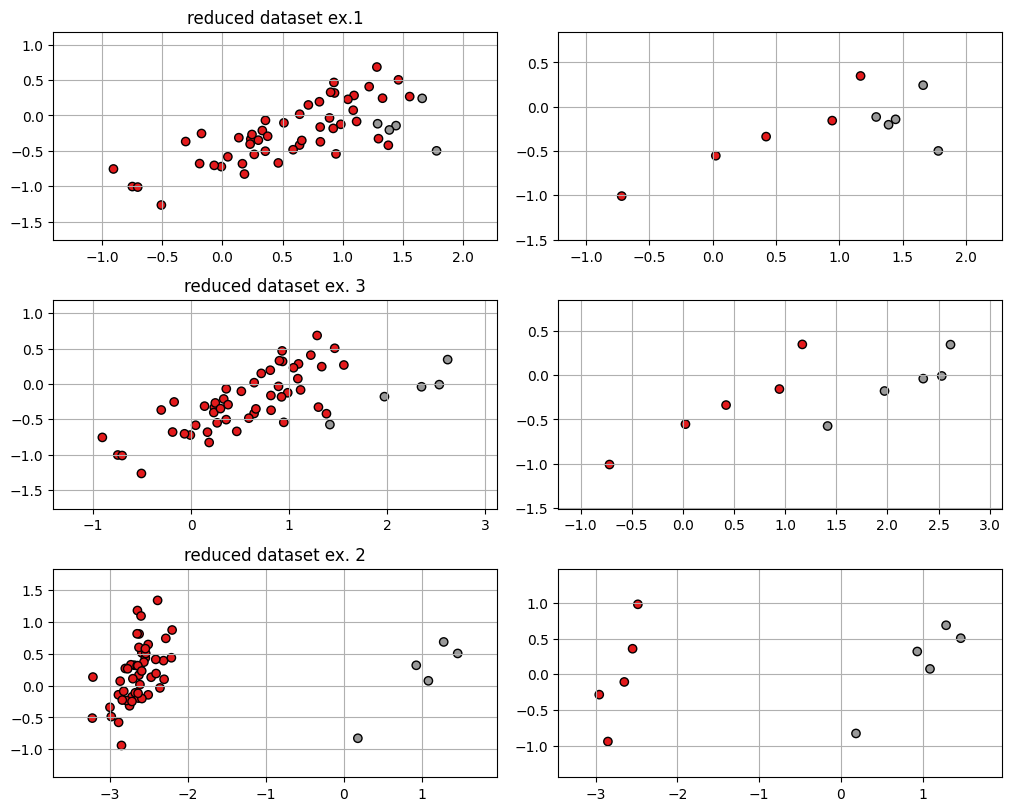

In [46]:
import matplotlib.gridspec as gridspec

# x_train_imb, x_test_imb, y_train_imb, y_test_imb

fig = plt.figure(figsize=(10,8), constrained_layout=True, dpi=100)
spec = gridspec.GridSpec(nrows=3, ncols=2, figure=fig)


# ...
ax00 = fig.add_subplot(spec[0, 0])
subplot(ax00, X_reduced_2d, y, 'reduced dataset ex.1')

ax01 = fig.add_subplot(spec[0, 1])
subplot(ax01, X_resampled_2d, y_resampled)


# ...
ax10 = fig.add_subplot(spec[1, 0])
subplot(ax10, pca_iris.transform(X_1), y_1, 'reduced dataset ex. 3')

ax11 = fig.add_subplot(spec[1, 1])
subplot(ax11, X_resampled_1_2d, y_resampled_1)


# ...
ax20 = fig.add_subplot(spec[2, 0])
subplot(ax20, pca_iris.transform(X_0), y_0, 'reduced dataset ex. 2')

ax21 = fig.add_subplot(spec[2, 1])
subplot(ax21, X_resampled_0_2d, y_resampled_0)


plt.show();

## Forest

In [47]:
# train ...
# X_resampled, y_resampled
# X_test, y_test

**ex. forest 1**

In [48]:
RandomForestClassifier_pipe_1 = SK_Pipeline([
    ('standardScaler', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
])

In [49]:
RandomForestClassifier_pipe_1.fit(X, y)

Pipeline(steps=[('standardScaler', StandardScaler()),
                ('RandomForestClassifier', RandomForestClassifier())])

**ex. forest 2**

In [50]:
RandomForestClassifier_pipe_2 = SK_Pipeline([
    ('standardScaler', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
])

In [51]:
RandomForestClassifier_pipe_2.fit(X_resampled, y_resampled)

Pipeline(steps=[('standardScaler', StandardScaler()),
                ('RandomForestClassifier', RandomForestClassifier())])

y :  Counter({1: 50, 2: 5})
y_resampled :  Counter({1: 5, 2: 5})
y_test :  Counter({1: 25, 2: 15})


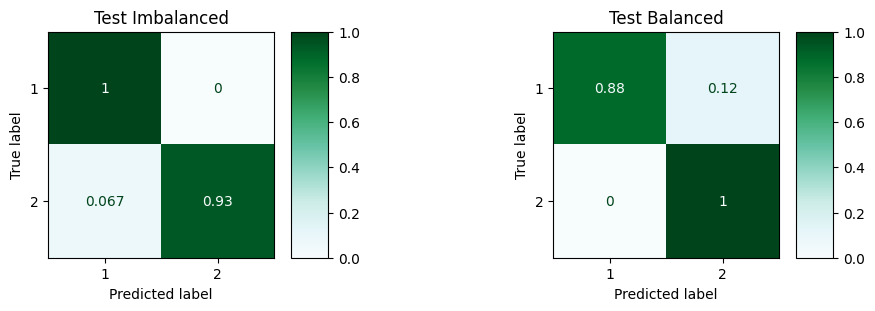

In [89]:
print('y : ',Counter(y))
print('y_resampled : ', Counter(y_resampled))
print('y_test : ', Counter(y_test))

# ...
fig = plt.figure(figsize=(10,3), constrained_layout=True, dpi=100)
spec = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)


# Imbalanced ...
# ...
ax1 = fig.add_subplot(spec[0, 0])
ax1.set_title('Test Imbalanced')
plot_confusion_matrix(
    RandomForestClassifier_pipe_1,
    X_test,
    y_test,
    cmap="BuGn",
    normalize='true',
    ax=ax1
)

# ...
ax2 = fig.add_subplot(spec[0, 1])
ax2.set_title('Test Balanced')
plot_confusion_matrix(
    RandomForestClassifier_pipe_2,
    X_test,
    y_test,
    cmap="BuGn",
    normalize='true',
    ax=ax2
)

plt.show();

In [90]:
y_test_pred_1 = RandomForestClassifier_pipe_1.predict(X_test)


pd.crosstab(y_test, y_test_pred_1, normalize="index")

col_0,1,2
row_0,,
1,1.000000,0.000000
2,0.066667,0.933333


In [55]:
y_test_pred_2 = RandomForestClassifier_pipe_2.predict(X_test)


pd.crosstab(y_test, y_test_pred_2, normalize="index")

col_0,1,2
row_0,,
1,0.88,0.12
2,0.00,1.00


## Combine oversampling and undersampling

### ex. 4

In [56]:
# ...
over = RandomOverSampler(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)

# ...
pipeline_ov_rand_un_rand = Pipeline(steps=[
    ('o', over),
    ('u', under)
])
pipeline_ov_rand_un_rand

Pipeline(steps=[('o', RandomOverSampler(sampling_strategy=0.3)),
                ('u', RandomUnderSampler(sampling_strategy=0.5))])

In [57]:
X_resampled_3, y_resampled_3 = pipeline_ov_rand_un_rand.fit_resample(X, y)

In [58]:
X_resampled_3.shape

(45, 4)

In [59]:
y_resampled_3.shape

(45,)

In [60]:
X_resampled_3_2d = pca_iris.transform(X_resampled_3)

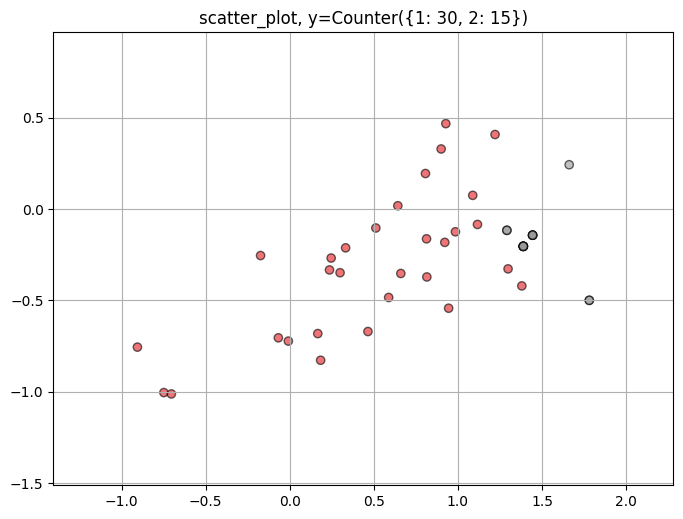

In [61]:
scatter_plot(X_resampled_3_2d, y_resampled_3)

In [62]:
u = np.unique(X_resampled_3_2d[np.where(y_resampled_3 == 2)])
np.asarray(u).T

array([-0.49990168, -0.20439933, -0.14341341, -0.11666865,  0.24222841,
        1.29113206,  1.38876613,  1.44416124,  1.66177415,  1.78129481])

### ex. 5

In [63]:
X.shape

(55, 4)

In [64]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [65]:
# ...
pipeline_somte_centroid = Pipeline(steps=[
    ('o', SMOTE(k_neighbors=3)),
    ('u', ClusterCentroids(random_state=0))
])
pipeline_somte_centroid

Pipeline(steps=[('o', SMOTE(k_neighbors=3)),
                ('u', ClusterCentroids(random_state=0))])

In [66]:
X_resampled_4, y_resampled_4 = pipeline_somte_centroid.fit_resample(X.copy(), y.copy())

In [67]:
X_resampled_4.shape

(100, 4)

In [68]:
y_resampled_4.shape

(100,)

In [69]:
X_resampled_4_2d = pca_iris.transform(X_resampled_4)

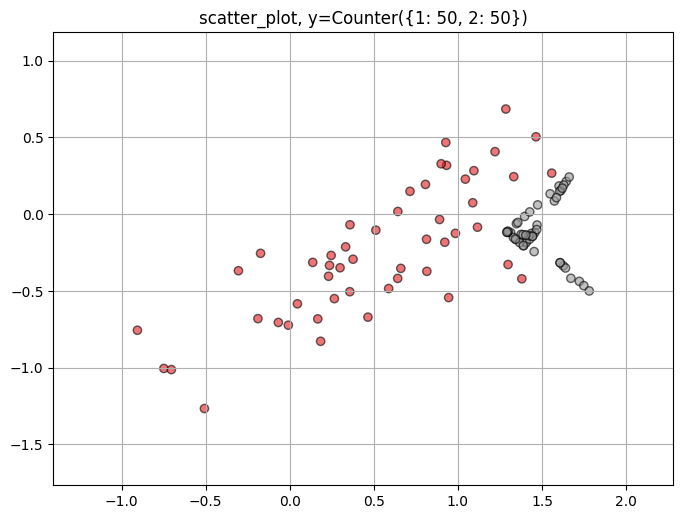

In [70]:
scatter_plot(X_resampled_4_2d, y_resampled_4)

In [71]:
y_resampled_4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Summary

1. When we use the PCA, or another algorithm that reducing the dimensionality, should be fitted before balancing samples `?????????` `TODO MAP`

## Resources

### Basic/Errors
1. [[0.1.] interactive-matplotlib-window-in-ipython-notebook](https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook)
2. [[0.2.] Using matplotlib in jupyter notebooks](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1)
3. [[0.3] MatPlot (ImportError: Failed to import any qt binding
)](https://stackoverflow.com/questions/52346254/importerror-failed-to-import-any-qt-binding-python-tensorflow)

### Books
1. [[1.1] prototype generation](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html#prototype-generation)

### Web

<!-- 

https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t9

https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

**What are the Differences between Dense and Sparse Data?**
https://docs.oracle.com/cd/A91202_01/901_doc/olap.901/a86720/esdatao6.htm#:~:text=Definition%3A%20Sparse%20data,storage%20space%20in%20the%20file.

https://magoosh.com/data-science/what-is-sparse-data/

**What are the Differences between Dense and Sparse Data?**

https://magoosh.com/data-science/what-is-sparse-data/#:~:text=Dense%20data%20can%20be%20described,that%20it%20represents%20is%20rare.

-->